In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [32]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [33]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [34]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key


In [35]:
# Starting URL for Weather Map API Call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [36]:
# Create an endpoint url for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 70.27,
  'feels_like': 69.91,
  'temp_min': 64.17,
  'temp_max': 73.09,
  'pressure': 1013,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 341, 'gust': 1.01},
 'clouds': {'all': 14},
 'dt': 1658886048,
 'sys': {'type': 2,
  'id': 2010120,
  'country': 'US',
  'sunrise': 1658827838,
  'sunset': 1658880636},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [37]:
# Get the JSON data.
boston_data=city_weather.json()


In [28]:
boston_data["sys"]["country"]

'US'

In [38]:
boston_data["dt"]

1658886048

In [39]:
lat=boston_data["coord"]["lat"]
lng=boston_data["coord"]["lon"]
max_temp=boston_data["main"]["temp_max"]
humidity=boston_data["main"]["humidity"]
clouds=boston_data["clouds"]["all"]
wind=boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 73.09 62 14 1.01


In [40]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date=boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-27 01:40:48'

In [41]:
# Loop through all the cities in our list.
#for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >=50):
#        set_count += 1
#        record_count = 1
    # Create endpoint URL with each city.
#    city_url = url = "&q=" + cities[i]
print(cities)

['riverton', 'thompson', 'kapaa', 'sinnamary', 'port elizabeth', 'grand river south east', 'zakamensk', 'lipin bor', 'port hardy', 'esperance', 'hermanus', 'illoqqortoormiut', 'vaini', 'kaitangata', 'kavieng', 'george', 'zaysan', 'rocha', 'popondetta', 'mys shmidta', 'rikitea', 'port alfred', 'jabiru', 'bluff', 'san jose', 'ajdabiya', 'hobart', 'kijang', 'hovd', 'carnarvon', 'calatayud', 'busselton', 'pata', 'tubuala', 'punta arenas', 'erdenet', 'plettenberg bay', 'callaguip', 'sept-iles', 'ratnagiri', 'kabare', 'hithadhoo', 'anadyr', 'nikolskoye', 'mitu', 'rungata', 'atuona', 'verkhnyaya inta', 'changji', 'ushuaia', 'cape town', 'bredasdorp', 'mullaitivu', 'halalo', 'dondo', 'bethel', 'ghanzi', 'jizan', 'kenai', 'new norfolk', 'grindavik', 'maydolong', 'igarka', 'teacapan', 'forbes', 'cabedelo', 'taolanaro', 'kargopol', 'salalah', 'dikson', 'moose factory', 'norman wells', 'nyurba', 'airai', 'mataura', 'jamestown', 'the valley', 'daru', 'weihai', 'narsaq', 'svetlogorsk', 'faanui', 'ko

In [42]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [43]:
# Create an empty list to hold the weather data.
city_data=[]
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count=1
set_count=1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1

# Run and API request for each of the cities.
    try:
        # Parse the JSON and retieve data.
        city_weather=requests.get(city_url).json()
        # Parse out the needed data.
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City":city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate the Data Loading is complete.
print("--------------------------")
print("Data Retrieval Complete   ")
print("--------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | riverton
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | sinnamary
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | zakamensk
Processing Record 8 of Set 1 | lipin bor
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | george
Processing Record 17 of Set 1 | zaysan
Processing Record 18 of Set 1 | rocha
Processing Record 19 of Set 1 | popondetta
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 o

Processing Record 40 of Set 4 | kimamba
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | kerteh
City not found. Skipping...
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | andenes
Processing Record 46 of Set 4 | hilo
Processing Record 47 of Set 4 | boende
Processing Record 48 of Set 4 | houma
Processing Record 49 of Set 4 | baruun-urt
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | acari
Processing Record 2 of Set 5 | pangnirtung
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | mahina
Processing Record 6 of Set 5 | san lawrenz
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | te anau
Processing Record 9 of Set 5 | imbituba
Processing Record 10 of Set 5 | sydney
Processing Record 11 of Set 5 | marinette
Processing Record 12 of Set 5 | vitim
Processing Record 13 of Set 5 | castro
Processing Reco

Processing Record 24 of Set 8 | neryungri
Processing Record 25 of Set 8 | geraldton
Processing Record 26 of Set 8 | tautira
Processing Record 27 of Set 8 | vestmannaeyjar
Processing Record 28 of Set 8 | walvis bay
Processing Record 29 of Set 8 | nakhodka
Processing Record 30 of Set 8 | tasiilaq
Processing Record 31 of Set 8 | dodge city
Processing Record 32 of Set 8 | taksimo
Processing Record 33 of Set 8 | arroio grande
Processing Record 34 of Set 8 | zhurivka
Processing Record 35 of Set 8 | kysyl-syr
Processing Record 36 of Set 8 | vertientes
Processing Record 37 of Set 8 | ampanihy
Processing Record 38 of Set 8 | kalmunai
Processing Record 39 of Set 8 | enshi
Processing Record 40 of Set 8 | karratha
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | mayumba
Processing Record 43 of Set 8 | nanakuli
Processing Record 44 of Set 8 | san jeronimo
Processing Record 45 of Set 8 | fairmont
Processing Record 46 of Set 8 | milkovo
Processing Record 47 of Set 8 | comodoro riv

Processing Record 14 of Set 12 | camacha
Processing Record 15 of Set 12 | gat
Processing Record 16 of Set 12 | zhangjiakou
Processing Record 17 of Set 12 | tezu
Processing Record 18 of Set 12 | touros
Processing Record 19 of Set 12 | jiazi
Processing Record 20 of Set 12 | lagoa
Processing Record 21 of Set 12 | hearst
Processing Record 22 of Set 12 | rodrigues alves
Processing Record 23 of Set 12 | uusikaupunki
Processing Record 24 of Set 12 | egvekinot
Processing Record 25 of Set 12 | muli
Processing Record 26 of Set 12 | roald
Processing Record 27 of Set 12 | asfi
Processing Record 28 of Set 12 | burgersdorp
Processing Record 29 of Set 12 | praxedis guerrero
Processing Record 30 of Set 12 | hunza
City not found. Skipping...
Processing Record 31 of Set 12 | sturgis
Processing Record 32 of Set 12 | burnie
Processing Record 33 of Set 12 | karasjok
Processing Record 34 of Set 12 | oranjestad
Processing Record 35 of Set 12 | sinkat
City not found. Skipping...
Processing Record 36 of Set 12

In [45]:
len(city_data)

580

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,69.55,93,100,3.00,EC,2022-07-27 01:38:54
1,Grindavik,63.8424,-22.4338,55.35,100,100,17.27,IS,2022-07-27 01:39:37
2,Nikolskoye,59.7035,30.7861,66.09,90,100,4.90,RU,2022-07-27 01:39:37
3,Katsuura,35.1333,140.3000,84.22,81,62,15.12,JP,2022-07-27 01:39:38
4,Ribeira Grande,38.5167,-28.7000,74.14,85,38,8.72,PT,2022-07-27 01:39:38
5,Barrow,71.2906,-156.7887,35.62,93,100,14.97,US,2022-07-27 01:39:38
6,Rikitea,-23.1203,-134.9692,74.73,74,78,8.55,PF,2022-07-27 01:39:39
7,Albany,42.6001,-73.9662,65.88,76,0,4.18,US,2022-07-27 01:37:38
8,Changde,29.0464,111.6783,90.84,61,99,3.31,CN,2022-07-27 01:39:39
9,Bluff,-46.6000,168.3333,47.80,91,100,20.31,NZ,2022-07-27 01:39:40


In [47]:
# Assing new column order
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-07-27 01:38:54,-0.7393,-90.3518,69.55,93,100,3.00
1,Grindavik,IS,2022-07-27 01:39:37,63.8424,-22.4338,55.35,100,100,17.27
2,Nikolskoye,RU,2022-07-27 01:39:37,59.7035,30.7861,66.09,90,100,4.90
3,Katsuura,JP,2022-07-27 01:39:38,35.1333,140.3000,84.22,81,62,15.12
4,Ribeira Grande,PT,2022-07-27 01:39:38,38.5167,-28.7000,74.14,85,38,8.72
...,...,...,...,...,...,...,...,...,...
542,Balaipungut,ID,2022-07-27 01:42:57,1.0500,101.2833,79.32,88,100,4.36
543,Chimbote,PE,2022-07-27 01:40:10,-9.0853,-78.5783,62.01,87,77,10.94
544,Amsterdam,NL,2022-07-27 01:38:14,52.3740,4.8897,58.89,82,19,1.01
545,Labrea,BR,2022-07-27 01:42:57,-7.2586,-64.7981,77.85,54,98,1.23


In [50]:
# Created the output file (CSV)
output_data_file="weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

In [52]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658887058.257149

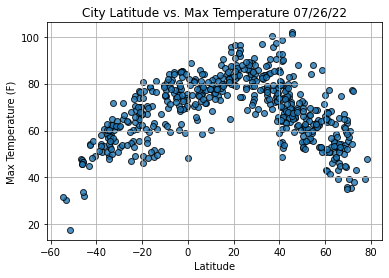

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

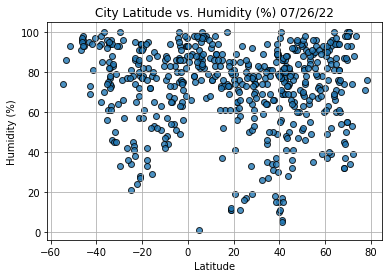

In [54]:
# Build the scatter plot for latitued vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
            
# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

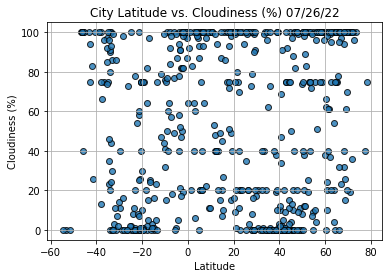

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

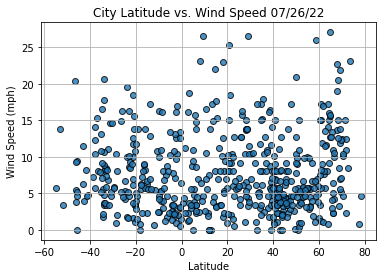

In [56]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [59]:
index13=city_data_df.loc[13]
index13

City                     Edendale
Country                        ZA
Date          2022-07-27 01:39:41
Lat                      -29.6528
Lng                       30.3147
Max Temp                    53.01
Humidity                       33
Cloudiness                     11
Wind Speed                   5.91
Name: 13, dtype: object

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [61]:
# Create Nothern and Southern Hemisphere DataFrames.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

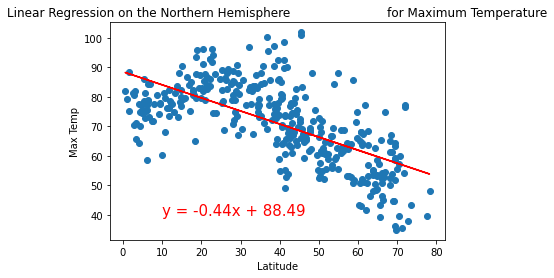

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

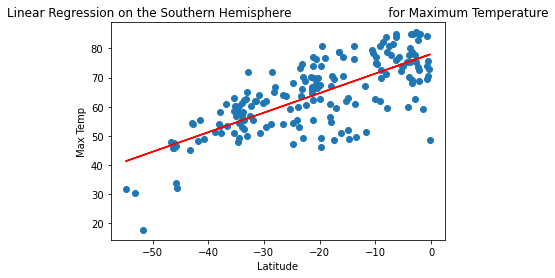

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

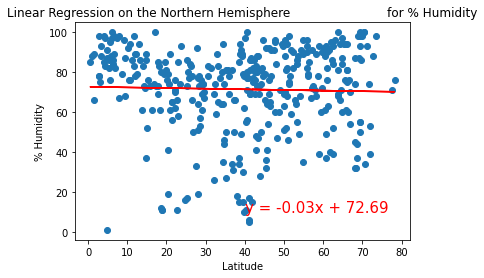

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


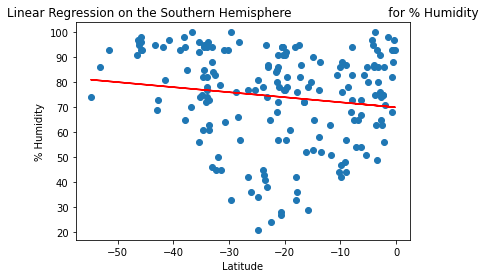

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

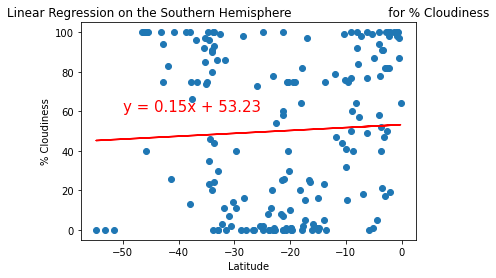

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

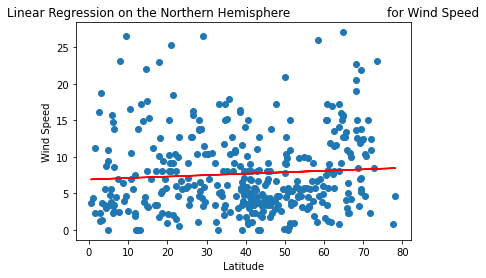

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


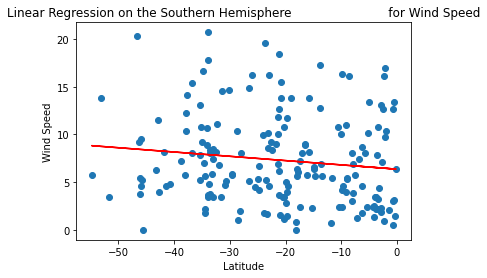

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))